<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</b>
       * Очистка и подготовка данных
       * Пробразования данных: слияние, комбинирование и смена размерности
       * Комбинирование и слияние наборов данных

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

#### Пропуски
* Исходные данные редко (почти никогда) не бывает "чистыми"
* Основновными проблемами являются: __пропуски__ и __выбросы__
* Работа с неполными данными может быть организована __по разному__
* От того, как мы будем работать с этим зависит __качество__ последующей обработки
* Существенную помощь в заполнении данных оказывают __статистика__ и __графики__

#### Отчеты
* Отчет - это __"лицо"__ проведенной работы
* (очень) Усредненно отчет по данным состоит из:
    - описания __входных__ данных
    - основной части с __графиками__ и __таблицами__
    - выводов
* Наиболее распространенный элемент отчета - __сводная таблица__
* Для построения таблицы используются функции __группировки__ и __агрегирования (агрегации)__

#### Преобразования
* данные редко "доживают" до конца в неизменном виде, "перетекая" между различными датафреймами, массивами и сериями с сохранением исходного значения
* это происходит за счет __реиндексации__, __слияний__, __разделений__, __преобразование размерности__, __преобразований строк и столбцов__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os
from numpy.random import randn
%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

In [12]:
# https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

In [135]:
# ds = os.path.join("..", "datasets", "Hourly Weather Surface - Brazil", "sudeste.csv")
df = pd.read_csv("sudeste.csv", nrows=1000)

In [143]:
df.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
821,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-10 05:00:00,2007-12-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-25 14:00:00,2007-11-25,...,32.5,19.4,30.5,16.9,41.0,50.0,40.0,1.8,85.0,4.5
899,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-13 11:00:00,2007-12-13,...,25.9,19.0,25.4,18.3,64.0,67.0,63.0,2.2,75.0,4.9
266,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17 02:00:00,2007-11-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-12 05:00:00,2007-12-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df.shape

(1000, 31)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 821 to 770
Data columns (total 31 columns):
wsid    1000 non-null int64
wsnm    1000 non-null object
elvt    1000 non-null float64
lat     1000 non-null float64
lon     1000 non-null float64
inme    1000 non-null object
city    1000 non-null object
prov    1000 non-null object
mdct    1000 non-null object
date    1000 non-null object
yr      1000 non-null int64
mo      1000 non-null int64
da      1000 non-null int64
hr      1000 non-null int64
prcp    389 non-null float64
stp     1000 non-null float64
smax    1000 non-null float64
smin    1000 non-null float64
gbrd    581 non-null float64
temp    1000 non-null float64
dewp    1000 non-null float64
tmax    1000 non-null float64
dmax    1000 non-null float64
tmin    1000 non-null float64
dmin    1000 non-null float64
hmdy    1000 non-null float64
hmax    1000 non-null float64
hmin    1000 non-null float64
wdsp    969 non-null float64
wdct    1000 non-null float64
gust    996

In [146]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,1000.0,1000.0,1.000000e+03,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,389.0,1000.000000,...,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,969.000000,1000.000000,996.000000
mean,178.0,237.0,-6.835777e+00,-38.311583,2007.0,11.400000,14.336000,11.436000,0.0,600.692600,...,18.8335,10.494100,17.591500,9.218800,28.169000,30.78600,25.163000,1.348813,63.544000,3.359438
std,0.0,0.0,1.777246e-15,0.000000,0.0,0.490143,7.788952,6.913009,0.0,479.542233,...,15.5639,8.702954,14.589996,7.731249,25.814663,28.25857,23.501676,1.391845,63.288985,3.339573
min,178.0,237.0,-6.835777e+00,-38.311583,2007.0,11.000000,1.000000,0.000000,0.0,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,178.0,237.0,-6.835777e+00,-38.311583,2007.0,11.000000,8.000000,5.000000,0.0,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,178.0,237.0,-6.835777e+00,-38.311583,2007.0,11.000000,13.000000,11.000000,0.0,980.800000,...,26.9000,15.050000,25.100000,12.800000,30.000000,33.00000,27.500000,1.100000,72.000000,2.800000
75%,178.0,237.0,-6.835777e+00,-38.311583,2007.0,12.000000,20.000000,17.000000,0.0,983.725000,...,33.0000,17.900000,30.800000,15.900000,48.000000,54.00000,42.000000,2.400000,104.000000,6.300000
max,178.0,237.0,-6.835777e+00,-38.311583,2007.0,12.000000,30.000000,23.000000,0.0,988.500000,...,37.1000,24.600000,35.900000,22.300000,96.000000,97.00000,93.000000,6.100000,357.000000,12.600000


## <font color=red>ЗАДАНИЕ</font>

Какие поля в describe "бесполезны" и почему?

In [133]:
df.wsid.unique()

array([178], dtype=int64)

## <font color=red>ЗАДАНИЕ</font>

Выведите графики средней температуры и средней влажности на метеостанции 383 зависимости от даты либо в двух смежных графиках, либо на одном с правой и левой осями

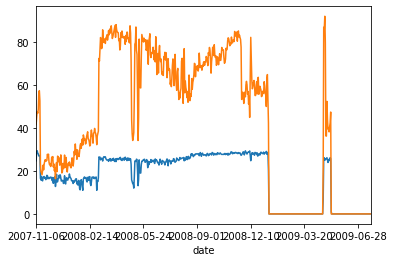

In [42]:
# Ваш код
df[df['wsid'] == 178].groupby("date")["temp"].mean().plot()
# df[df['wsid'] == 178].groupby("date")["hmdy"].mean().plot()



## Очистка и подготовка данных

### Работа пропущенных данных

In [43]:
string_data = pd.Series(['дыня', 'тыква', np.nan, 'помидор'])
string_data

0       дыня
1      тыква
2        NaN
3    помидор
dtype: object

In [44]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [45]:
string_data

0       None
1      тыква
2        NaN
3    помидор
dtype: object

### Фильтрация пропущенных данных

In [46]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [47]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [48]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [49]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [50]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [51]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [52]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [53]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.673243,NaN,NaN
1,-0.324508,NaN,NaN
2,-1.220130,NaN,1.049325
3,1.226502,NaN,-0.077514
4,0.093967,-0.007416,1.250004
5,-0.332850,0.766737,0.414157
6,1.996429,0.174992,-1.340252


In [54]:
df.dropna()
df.dropna(thresh=2)

,0,1,2
2,-1.220130,NaN,1.049325
3,1.226502,NaN,-0.077514
4,0.093967,-0.007416,1.250004
5,-0.332850,0.766737,0.414157
6,1.996429,0.174992,-1.340252


### Заполнение пропущенных данных

In [55]:
df.fillna(0)

,0,1,2
0,-0.673243,0.000000,0.000000
1,-0.324508,0.000000,0.000000
2,-1.220130,0.000000,1.049325
3,1.226502,0.000000,-0.077514
4,0.093967,-0.007416,1.250004
5,-0.332850,0.766737,0.414157
6,1.996429,0.174992,-1.340252


In [56]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.673243,0.500000,0.000000
1,-0.324508,0.500000,0.000000
2,-1.220130,0.500000,1.049325
3,1.226502,0.500000,-0.077514
4,0.093967,-0.007416,1.250004
5,-0.332850,0.766737,0.414157
6,1.996429,0.174992,-1.340252


In [57]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.673243,0.000000,0.000000
1,-0.324508,0.000000,0.000000
2,-1.220130,0.000000,1.049325
3,1.226502,0.000000,-0.077514
4,0.093967,-0.007416,1.250004
5,-0.332850,0.766737,0.414157
6,1.996429,0.174992,-1.340252


In [58]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.755303,0.169628,0.085987
1,-1.009946,-0.170366,0.117290
2,-0.683532,NaN,0.273349
3,-0.640189,NaN,-0.486080
4,0.509065,NaN,NaN
5,-0.270685,NaN,NaN


In [59]:
df.fillna(method='ffill')

,0,1,2
0,-0.755303,0.169628,0.085987
1,-1.009946,-0.170366,0.117290
2,-0.683532,-0.170366,0.273349
3,-0.640189,-0.170366,-0.486080
4,0.509065,-0.170366,-0.486080
5,-0.270685,-0.170366,-0.486080


In [60]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.755303,0.169628,0.085987
1,-1.009946,-0.170366,0.117290
2,-0.683532,-0.170366,0.273349
3,-0.640189,-0.170366,-0.486080
4,0.509065,NaN,-0.486080
5,-0.270685,NaN,-0.486080


In [61]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Преобразования данных

### Удаление дубликатов

In [62]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [65]:
data.duplicated().value_counts()

False    6
True     1
dtype: int64

In [64]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [67]:
data['v1'] = range(7)
data


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [68]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [69]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Преобразование данных с помощью отображения и функции

In [70]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [71]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [72]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [74]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [75]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Замена значений

In [76]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [80]:
data.describe()

count       6.000000
mean     -498.666667
std       548.453340
min     -1000.000000
25%      -999.000000
50%      -499.000000
75%         1.750000
max         3.000000
dtype: float64

In [77]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [78]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [79]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Переименование индексов осей

In [81]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [82]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [83]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [84]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [85]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [86]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Дискретизация и раскладка по "корзинам"

In [87]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [88]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [89]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [90]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [91]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [92]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.51, 0.75], (0.75, 0.99], (0.28, 0.51], (0.036, 0.28], (0.51, 0.75], ..., (0.28, 0.51], (0.51, 0.75], (0.75, 0.99], (0.75, 0.99], (0.51, 0.75]]
Length: 20
Categories (4, interval[float64]): [(0.036, 0.28] < (0.28, 0.51] < (0.51, 0.75] < (0.75, 0.99]]

In [93]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(0.606, 3.024]       250
(-0.0906, 0.606]     250
(-0.751, -0.0906]    250
(-3.565, -0.751]     250
dtype: int64

In [94]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0906, 1.207], (-1.263, -0.0906], (-1.263, -0.0906], (-1.263, -0.0906], (-1.263, -0.0906], ..., (-1.263, -0.0906], (-3.565, -1.263], (-1.263, -0.0906], (-0.0906, 1.207], (-0.0906, 1.207]]
Length: 1000
Categories (4, interval[float64]): [(-3.565, -1.263] < (-1.263, -0.0906] < (-0.0906, 1.207] < (1.207, 3.024]]

### Детектирование и фильтрация выборосов

In [103]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.002101,0.006227,0.006220,-0.010636
std,0.973503,0.996870,0.999830,1.043648
min,-2.857061,-3.148695,-3.985835,-3.822802
25%,-0.627771,-0.670669,-0.695169,-0.721972
50%,0.004534,-0.014672,0.057546,-0.002858
75%,0.676510,0.697862,0.653543,0.670895
max,3.418611,3.020807,3.729967,3.176466


In [104]:
data

,0,1,2,3
0,0.270853,-1.378400,-0.073644,0.270578
1,0.900908,-0.717262,0.747118,-1.058345
2,-2.015189,1.155067,2.088861,-0.348021
3,0.138506,-0.444520,0.984429,1.806006
4,0.658056,-0.393685,-0.672889,0.687199
...,...,...,...,...
995,-0.605848,1.182985,0.198586,-1.296155
996,0.462107,1.865650,-0.772087,-1.776020
997,1.310451,0.832375,0.376878,1.571755
998,0.207085,3.012729,-0.382323,0.510843


In [105]:
col = data[2]
col[np.abs(col) > 3]

335    3.729967
616   -3.091449
771   -3.985835
Name: 2, dtype: float64

In [106]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
150,0.414126,0.281510,-0.956507,-3.042796
189,-2.618409,0.458805,-0.138290,-3.126543
204,3.418611,0.741363,-0.798976,0.140194
249,1.414580,-3.042801,0.244720,0.440707
297,-0.571022,3.020807,0.333830,0.387266
309,0.215727,-0.947032,-2.313224,-3.822802
335,-1.412829,-1.276069,3.729967,0.105440
484,-1.289319,-3.148695,0.322722,1.196957
576,-1.475971,-1.606712,0.170137,3.176466
616,-1.045364,-0.706860,-3.091449,-0.518623


In [107]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001642,0.006385,0.006567,-0.009821
std,0.971996,0.996179,0.993623,1.039938
min,-2.857061,-3.000000,-3.000000,-3.000000
25%,-0.627771,-0.670669,-0.695169,-0.721972
50%,0.004534,-0.014672,0.057546,-0.002858
75%,0.676510,0.697862,0.653543,0.670895
max,3.000000,3.000000,3.000000,3.000000


In [108]:
np.sign(data).head()

,0,1,2,3
0,1.0,-1.0,-1.0,1.0
1,1.0,-1.0,1.0,-1.0
2,-1.0,1.0,1.0,-1.0
3,1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0


### Перестановка и случайная выборка

In [114]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([2, 0, 3, 4, 1])

In [115]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [116]:
df
df.take(sampler)

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7


In [111]:
df.sample(n=3)

,0,1,2,3
4,16,17,18,19
0,0,1,2,3
1,4,5,6,7


In [112]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

0    5
4    4
0    5
0    5
4    4
4    4
3    6
2   -1
4    4
3    6
dtype: int64

### Вычисление индикативных (знаковых) переменных

In [147]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [148]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [158]:
mnames = ['movie_id', 'title', 'genres']
ml_1m = os.path.join("movies.dat")
#movies = pd.read_table(ml_1m, sep='::', header=None, names=mnames)
movies = pd.read_csv(ml_1m, sep='::', header=None, names=mnames, engine='python')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [159]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [160]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [162]:
zero_matrix = np.zeros((len(movies), len(genres)))
zero_matrix.shape

(3883, 18)

In [166]:
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
gen = movies.genres[0]
gen

"Animation|Children's|Comedy"

In [169]:
gen.split('|')


['Animation', "Children's", 'Comedy']

In [170]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int32)

In [171]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [172]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

In [176]:
movies['genres'].str.get_dummies("|")

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [157]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


### Векторизация строковых операций в pandas

In [177]:
import re

In [178]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [179]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [180]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [181]:
# Важно! За findall находится re, без него не заработает
import re

pattern = '.*ve'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave      [dave]
Steve    [steve]
Rob           []
Wes          NaN
dtype: object

In [186]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches, type(matches)

(Dave      True
 Steve     True
 Rob      False
 Wes        NaN
 dtype: object, pandas.core.series.Series)

In [187]:
matches.str.get(1)
matches.str[0]

AttributeError: Can only use .str accessor with string values!

In [188]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

## <font color=red>ЗАДАНИЕ</font>

* Какие  поля требуется заполнять
* Почему?
* Как Вы их будете заполнять?


In [ ]:
# Ваш код


## Пробразования данных: слияние, комбинирование и смена размерности

### Иерархическая индексация

In [192]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    1.343810
   2   -0.713544
   3   -0.831154
b  1   -2.370232
   3   -1.860761
c  1   -0.860757
   2    0.560145
d  2   -1.265934
   3    0.119827
dtype: float64

In [190]:
data = pd.Series(np.random.randn(10),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd', 'a'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3, 1]])
data

a  1   -0.438570
   2   -0.539741
   3    0.476985
b  1    3.248944
   3   -1.021228
c  1   -0.577087
   2    0.124121
d  2    0.302614
   3    0.523772
a  1    0.000940
dtype: float64

In [193]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [195]:
data['b']

1   -2.370232
3   -1.860761
dtype: float64

In [196]:
data['b':'c']

b  1   -2.370232
   3   -1.860761
c  1   -0.860757
   2    0.560145
dtype: float64

In [197]:
data.loc[['b', 'd']]

b  1   -2.370232
   3   -1.860761
d  2   -1.265934
   3    0.119827
dtype: float64

In [198]:
data.loc[:, 2]

a   -0.713544
c    0.560145
d   -1.265934
dtype: float64

In [199]:
data.unstack()

,1,2,3
a,1.343810,-0.713544,-0.831154
b,-2.370232,NaN,-1.860761
c,-0.860757,0.560145,NaN
d,NaN,-1.265934,0.119827


In [200]:
data.unstack().stack()

a  1    1.343810
   2   -0.713544
   3   -0.831154
b  1   -2.370232
   3   -1.860761
c  1   -0.860757
   2    0.560145
d  2   -1.265934
   3    0.119827
dtype: float64

In [217]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [218]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [219]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [220]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

### Переупорядочивание и сортировка уровней

In [221]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [222]:
frame.swaplevel('key2', 'key1')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [223]:
frame.sort_index(level=1)
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Суммарная статистика по индексу

In [228]:
frame.sum(level='key2')


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [229]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [230]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [231]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [232]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [216]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Комбинирование и слияние наборов данных

### Слияние в стиле реляционной СУБД

In [233]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [234]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [235]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [236]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [237]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [238]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [239]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [240]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [241]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [242]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [243]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [244]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Слияние по индексу

In [245]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [246]:
right1

,group_val
a,3.5
b,7.0


In [247]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [248]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [249]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [250]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [251]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [252]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [253]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [254]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [255]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [256]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [257]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [258]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [259]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [260]:
#left2.join([right2, another], how='outer')
left2.join([right2, another], how='outer', sort=True)

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Объединение вдоль осей

In [261]:
arr = np.arange(12).reshape((3, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [262]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [263]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [264]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [265]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [266]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [267]:
pd.concat([s1, s2, s3], axis=1, sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [268]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [269]:
pd.concat([s1, s4], axis=1, sort=True)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [270]:
pd.concat([s1, s4], axis=1, join='inner', sort=True)

,0,1
a,0,0
b,1,1


In [271]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']], sort=True)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [272]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [273]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [274]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [275]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort=True)

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [276]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [277]:
df2

,three,four
a,5,6
c,7,8


In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort=True)

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

In [ ]:
#pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
#          names=['upper', 'lower'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'], sort=True)

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True, sort=True)

### Комбинирование данных с перекрытием

In [278]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [279]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [280]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

In [ ]:
df2

In [ ]:
df1.combine_first(df2)

## Изменение размерностей и "повороты"

### Иерархическое индексирование и reshaping

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)
result.unstack('state')

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data2

In [ ]:
data2.unstack()

In [ ]:
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Поворот из "длинного" в "широкий" формат

In [282]:
data = pd.read_csv('macrodata.csv')
data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [284]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [286]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [287]:
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
data


item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [288]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [289]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [290]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-1.063512
1,1959-03-31 23:59:59.999999999,infl,0.000,0.332883
2,1959-03-31 23:59:59.999999999,unemp,5.800,-2.359419
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.199543
4,1959-06-30 23:59:59.999999999,infl,2.340,-1.541996
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.970736
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-1.307030
7,1959-09-30 23:59:59.999999999,infl,2.740,0.286350
8,1959-09-30 23:59:59.999999999,unemp,5.300,0.377984
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.753887


In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### Поворот из "широкого" в "длинный" формат

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

In [ ]:
reshaped.reset_index()

In [ ]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

## Агрегирование данных и групповые операции

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Итерация по группам|

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print(dtype)
    print(group)

### Выбор колонок или их подмножества

```python

df.groupby('key1')['data1'] 
df.groupby('key1')[['data2']]

является более удобной формой записи (syntactit sugar) для

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])
```

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

### Группировка по словарям и сериям

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

### Группировка с функциями

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Группировка по уровням индекса

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

### Агрегирование данных

In [ ]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

### Применение функции к столбцу и применение нескольких функций

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Возврат агрегированных двнных без строчных индексов

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

## Применение: разделить - применить - скомбинировать

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:

result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

### Подавление групповых ключей

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Анализ по квартилям и козинам

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Пример: заполнение отсутствущих значений с значениями, определенными для группы

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Пример: случайная выборка и перестановки

In [ ]:

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Пример: взвешенное по группе среднее и корреляция

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Пример: линейная регрессия по группам

In [ ]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

### Сводные таблицы и таблицы с разделением полей табуляцией (crosstab)

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#data = pd.read_table(StringIO(data), sep='\s+')
data = pd.read_csv(StringIO(data), sep='\s+')


In [ ]:
data

In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## По следующим занятиям

### 9-е занятие: 
* тестовая EDA 
* коллоквикум по EDA на учебном примере с kaggle

### Для подготовки: 
* Внимательно пересмотреть материал это и 2 предыдущих занятия
* Посмотреть dataset и kernels для Титаника на kaggle

## Экзаменационные вопросы:
* Очистка и подготовка данных
* Пробразования данных: слияние, комбинирование и смена размерности
* Комбинирование и слияние наборов данных
* Подход "разделить - применить - скомбинировать"